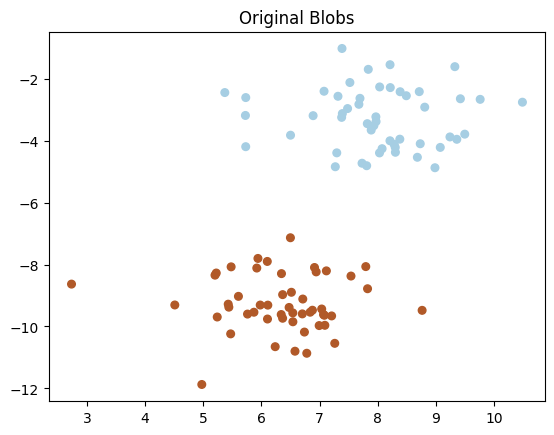

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
X, y = make_blobs(n_samples=100, centers=2, random_state=6)
y = 2 * y - 1  # Convert labels to -1 and 1


''' this is new'''
# Plot the original blobs
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, s=30)
plt.title("Original Blobs")
plt.show()

# Move one point from one blob to another
# Find the centroid of each blob
centroid_blob_1 = np.mean(X[y == -1], axis=0)
centroid_blob_2 = np.mean(X[y == 1], axis=0)

# Select the first point from blob 1 and move it closer to the centroid of blob 2
index_to_move = np.where(y == -1)[0][0]
X[index_to_move] = centroid_blob_2
'''until this'''

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Function to compute hinge loss gradient
def compute_gradient(X, y, w, b, C):
    margin = y * (np.dot(X, w) + b)
    loss = np.maximum(0, 1 - margin)
    dw = w - C * np.dot(y[loss > 0], X[loss > 0])
    db = -C * np.sum(y[loss > 0])
    return dw, db

# SVM parameters
C = 1.0  # Regularization parameter
learning_rate = 0.002
n_iterations = 100

# Initialize weights
w = np.random.randn(X.shape[1])
b = 0

# Store intermediate steps
ws = [w.copy()]
bs = [b]

# Perform gradient descent
for _ in range(n_iterations):
    dw, db = compute_gradient(X, y, w, b, C)
    w -= learning_rate * dw
    b -= learning_rate * db
    ws.append(w.copy())
    bs.append(b)


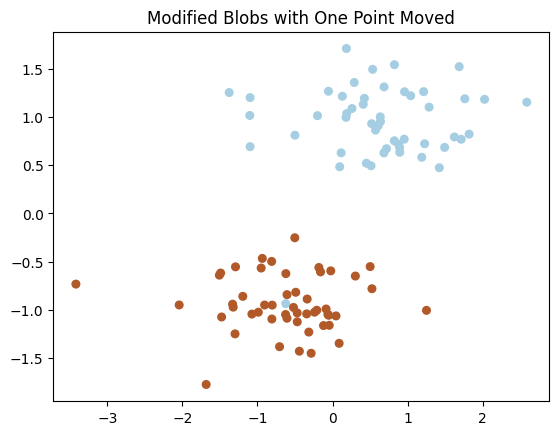

In [61]:
# Plot the modified blobs
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, s=30)
plt.title("Modified Blobs with One Point Moved")
plt.show()


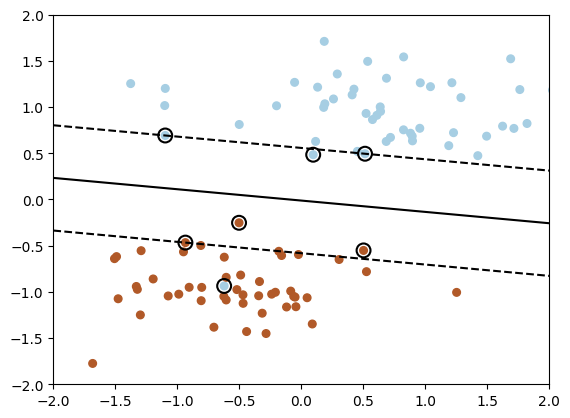

In [62]:
from sklearn.svm import SVC

# Train an SVM with a linear kernel
clf = SVC(kernel='linear', C=2.01)
clf.fit(X, y)

# Extract the coefficients and intercept
w = clf.coef_[0]
b = clf.intercept_[0]

# Identify support vectors
support_vectors = clf.support_vectors_
support_indices = clf.support_

# Compute the decision boundary
a = -w[0] / w[1]
xx = np.linspace(-2, 2)
yy = a * xx - b / w[1]

# Compute margins
margin = 1 / np.sqrt(np.sum(w ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

fig, ax = plt.subplots()

# Plot the data points
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, s=30)

# Plot the decision boundary
ax.plot(xx, yy, 'k-')

# Plot the margins
ax.plot(xx, yy_down, 'k--')
ax.plot(xx, yy_up, 'k--')

# Highlight the support vectors
ax.scatter(support_vectors[:, 0], support_vectors[:, 1], facecolors='none', edgecolors='k', s=100, linewidths=1.5)

ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
plt.show()

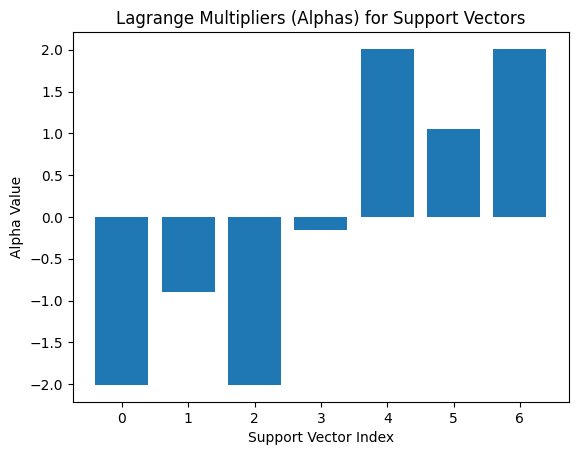

In [63]:
# Dual coefficients (Lagrange multipliers)
dual_coefs = clf.dual_coef_.flatten()

# Plot the values of the Lagrange multipliers
plt.figure()
plt.bar(range(len(dual_coefs)), dual_coefs)
plt.xlabel('Support Vector Index')
plt.ylabel('Alpha Value')
plt.title('Lagrange Multipliers (Alphas) for Support Vectors')
plt.show()


In [64]:
dual_coefs

array([-2.01      , -0.89680413, -2.01      , -0.15962996,  2.01      ,
        1.05643409,  2.01      ])

In [65]:
np.sum(dual_coefs)

4.440892098500626e-16

## Effect of C : data point close to boundary 

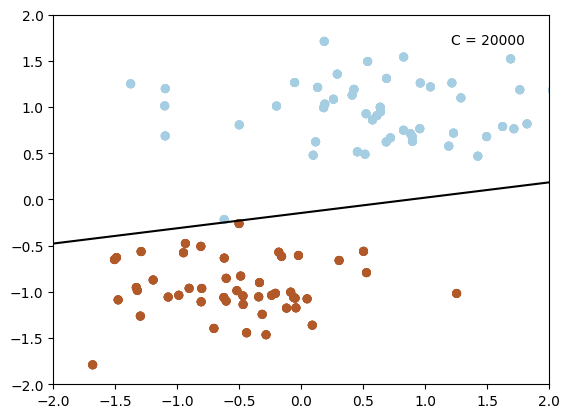

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

# Generate synthetic data
X, y = make_blobs(n_samples=100, centers=2, random_state=6)
y = 2 * y - 1  # Convert labels to -1 and 1

# Move one point from one blob to another
centroid_blob_1 = np.mean(X[y == -1], axis=0)
centroid_blob_2 = np.mean(X[y == 1], axis=0)
centroid_blob_2 = np.array([6.34358793, -7.])
index_to_move = np.where(y == -1)[0][0]
X[index_to_move] = centroid_blob_2

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Values for C to demonstrate the effect
C_values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.,1.5,2.0,3,4,5,6,7,8,9,10,
            11,12,13,14,15,16,17,18,19,20,25,30,35,40,45,50,55,60,70,80,90,
            100,125,150,175,200,250,300,400,500,600,700,
            800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,
            5000,10000,20000]

# Plot decision boundary with animation
fig, ax = plt.subplots()
contour = None
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, s=30)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)


def init():
    global scatter, decision_boundary_line, c_text
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, s=30)
    decision_boundary_line, = ax.plot([], [], 'k-')  # Initialize the decision boundary line
    c_text = ax.text(0.95, 0.95, '', transform=ax.transAxes, ha='right', va='top')
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    return scatter, decision_boundary_line, c_text

def update(C):
    # Clear the previous decision boundary line
    decision_boundary_line.set_data([], [])
    
    clf = SVC(C=C, kernel='linear', gamma='auto')
    clf.fit(X, y)
    
    # Create a mesh to plot in
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    a = -clf.coef_[0, 0] / clf.coef_[0, 1]
    xx_line = np.linspace(x_min, x_max)
    yy_line = a * xx_line - (clf.intercept_[0] / clf.coef_[0, 1])
    decision_boundary_line.set_data(xx_line, yy_line)
    
    # Update the C value text
    c_text.set_text(f'C = {C}')
    
    return scatter, decision_boundary_line, c_text



ani = FuncAnimation(fig, update, frames=C_values, init_func=init, blit=True)

# Save the animation
ani.save('svm_C_effect_animation_boundary.mp4', writer='ffmpeg')

plt.show()


## Effect of C: data point close to centroid 

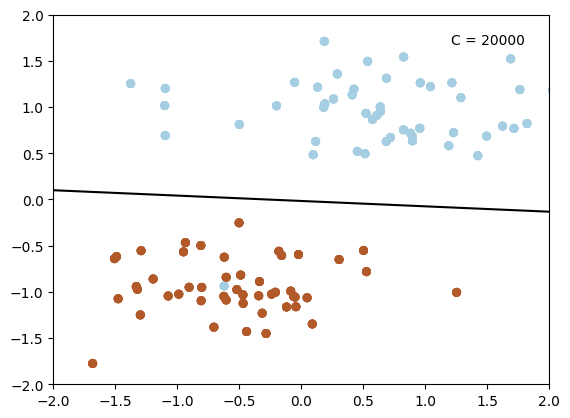

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

# Generate synthetic data
X, y = make_blobs(n_samples=100, centers=2, random_state=6)
y = 2 * y - 1  # Convert labels to -1 and 1

# Move one point from one blob to another
centroid_blob_1 = np.mean(X[y == -1], axis=0)
centroid_blob_2 = np.mean(X[y == 1], axis=0)
#centroid_blob_2 = np.array([6.34358793, -7.])
index_to_move = np.where(y == -1)[0][0]
X[index_to_move] = centroid_blob_2

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Values for C to demonstrate the effect
C_values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.,1.5,2.0,3,4,5,6,7,8,9,10,
            11,12,13,14,15,16,17,18,19,20,25,30,35,40,45,50,55,60,70,80,90,
            100,125,150,175,200,250,300,400,500,600,700,
            800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,
            5000,10000,20000]

# Plot decision boundary with animation
fig, ax = plt.subplots()
contour = None
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, s=30)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)


def init():
    global scatter, decision_boundary_line, c_text
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, s=30)
    decision_boundary_line, = ax.plot([], [], 'k-')  # Initialize the decision boundary line
    c_text = ax.text(0.95, 0.95, '', transform=ax.transAxes, ha='right', va='top')
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    return scatter, decision_boundary_line, c_text

def update(C):
    # Clear the previous decision boundary line
    decision_boundary_line.set_data([], [])
    
    clf = SVC(C=C, kernel='linear', gamma='auto')
    clf.fit(X, y)
    
    # Create a mesh to plot in
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    a = -clf.coef_[0, 0] / clf.coef_[0, 1]
    xx_line = np.linspace(x_min, x_max)
    yy_line = a * xx_line - (clf.intercept_[0] / clf.coef_[0, 1])
    decision_boundary_line.set_data(xx_line, yy_line)
    
    # Update the C value text
    c_text.set_text(f'C = {C}')
    
    return scatter, decision_boundary_line, c_text



ani = FuncAnimation(fig, update, frames=C_values, init_func=init, blit=True)

# Save the animation
ani.save('svm_C_effect_animation_centroid.mp4', writer='ffmpeg')

plt.show()


## Effect of C: noise at boundary with margin 

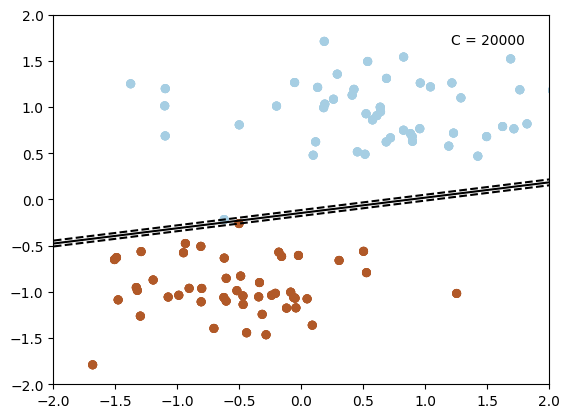

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

# Generate synthetic data
X, y = make_blobs(n_samples=100, centers=2, random_state=6)
y = 2 * y - 1  # Convert labels to -1 and 1

# Move one point from one blob to another
centroid_blob_1 = np.mean(X[y == -1], axis=0)
centroid_blob_2 = np.mean(X[y == 1], axis=0)
centroid_blob_2 = np.array([6.34358793, -7.])
index_to_move = np.where(y == -1)[0][0]
X[index_to_move] = centroid_blob_2

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Values for C to demonstrate the effect
C_values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.,1.5,2.0,3,4,5,6,7,8,9,10,
            11,12,13,14,15,16,17,18,19,20,25,30,35,40,45,50,55,60,70,80,90,
            100,125,150,175,200,250,300,400,500,600,700,
            800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,
            5000,10000,20000]

# Plot decision boundary with animation
fig, ax = plt.subplots()
contour = None
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, s=30)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)

def init():
    global scatter, decision_boundary_line, c_text
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, s=30)
    decision_boundary_line, = ax.plot([], [], 'k-')  # Initialize the decision boundary line
    c_text = ax.text(0.95, 0.95, '', transform=ax.transAxes, ha='right', va='top')
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    
    # Initialize margin lines
    ax.margin_lines = [
        ax.plot([], [], 'k--')[0],
        ax.plot([], [], 'k--')[0]
    ]
    
    return scatter, decision_boundary_line, ax.margin_lines[0], ax.margin_lines[1], c_text

def update(C):
    # Clear the previous decision boundary line and margins
    decision_boundary_line.set_data([], [])
    for line in ax.margin_lines:
        line.set_data([], [])
    
    clf = SVC(C=C, kernel='linear', gamma='auto')
    clf.fit(X, y)
    
    # Create a mesh to plot in
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    a = -clf.coef_[0, 0] / clf.coef_[0, 1]
    xx_line = np.linspace(x_min, x_max)
    yy_line = a * xx_line - (clf.intercept_[0] / clf.coef_[0, 1])
    decision_boundary_line.set_data(xx_line, yy_line)
    
    # Compute and plot the margin lines
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_margin_down = yy_line - np.sqrt(1 + a ** 2) * margin
    yy_margin_up = yy_line + np.sqrt(1 + a ** 2) * margin
    
    ax.margin_lines[0].set_data(xx_line, yy_margin_down)
    ax.margin_lines[1].set_data(xx_line, yy_margin_up)
    
    # Update the C value text
    c_text.set_text(f'C = {C}')
    
    return scatter, decision_boundary_line, ax.margin_lines[0], ax.margin_lines[1], c_text



ani = FuncAnimation(fig, update, frames=C_values, init_func=init, blit=True)

# Save the animation
ani.save('svm_C_effect_animation_boundary.mp4', writer='ffmpeg')

plt.show()
